In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
from tensorflow import keras
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
import matplotlib.pyplot as plt

In [5]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Lets visualize some of the data.

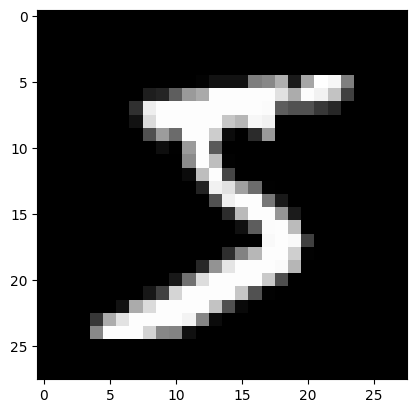

In [6]:
image = x_train[0]
plt.imshow(image, cmap="gray")

We need to prepare the data before we can use it with a model. To do this we will
- flatten the images into 1D representations instead of 2D 
- normalize the pixel values since neural nets are better at dealing with floating point numbers in a fixed range
- categorically encode the labels given to all the images

In [7]:
#Reshape (Flattening)
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [8]:
#Normalization
x_train = x_train/255
x_valid = x_test/255

In [9]:
#Categorical Encoding
num_classes = 10 #we have 10 output classes: 0,1,2,3,4,5,6,7,8,9
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

Lets create the model now.
We're gonna have an input layer, some hidden layers and finally the output layer
The overall model structure I want to implement is:
1. input layer (Dense) (input_shape = 784) (neurons = 512) (activation = relu)
2. 2 hidden layers (Dense) (neurons = 512) (activation = relu)
3. output layer (Dense) (neurons = 10 = number of output classes) (activation = softmax)

In [11]:
model = Sequential()
model.add (Dense(512 , input_shape = (784,), activation = "relu"))
model.add (Dense(512, activation = "relu"))
model.add (Dense(512, activation = "relu"))
model.add (Dense(num_classes, activation = "softmax"))

In [12]:
model.compile (loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x_train, y_train, epochs = 5, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1947 - accuracy: 0.9406 - val_loss: 15.4057 - val_accuracy: 0.9674
Epoch 2/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0917 - accuracy: 0.9719 - val_loss: 19.5287 - val_accuracy: 0.9680
Epoch 3/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0672 - accuracy: 0.9795 - val_loss: 14.7617 - val_accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 17.2363 - val_accuracy: 0.9741
Epoch 5/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0427 - accuracy: 0.9868 - val_loss: 16.2193 - val_accuracy: 0.9792


In [15]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [16]:
preds = model.predict(test)

875/875 [==============================] - 4s 4ms/step


In [17]:
preds = preds.round()

In [18]:
predsnew = []
for i in preds:
    i = i.tolist()
    predsnew.append(i.index(1.0))

In [19]:
output = pd.DataFrame()
output["ImageId"] = range(1,28001)
output["Label"] = predsnew
output = output.set_index("ImageId")

In [20]:
output

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3
...,...
27996,9
27997,7
27998,3


In [21]:
#generating output submission for kaggle contest
output.to_csv("submission.csv")

Got a 0.98782 public score and ranked 520 on the leaderboard!